In [162]:
import pandas as pd
import numpy as np

# Data Reading and Cleaning

In [163]:
df = pd.read_csv('bitcoin_historical_data.csv')
df

,Price,MA 7,MA 20,MA 50,RSI 7,RSI 14,RSI 21,Gain,Loss,Average Gain (7),Average Loss (7),Average Gain (14),Average Loss (14),Average Gain (21),Average Loss (21),%,Date,Positive
0,135.30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,141.96000,NaN,NaN,NaN,NaN,NaN,NaN,6.660000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.922395,4/30/2013,1
2,135.30000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,6.660000,NaN,NaN,NaN,NaN,NaN,NaN,-4.691462,5/1/2013,0
3,117.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,18.300000,NaN,NaN,NaN,NaN,NaN,NaN,-13.525499,5/2/2013,0
4,103.43000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,13.570000,NaN,NaN,NaN,NaN,NaN,NaN,-11.598291,5/3/2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,21660.59684,20094.14053,20361.83398,25210.27894,67.916013,47.741136,34.550735,1093.909613,0.000000,339.430662,160.349360,280.631079,307.187107,253.733636,480.646208,5.318842,7/7/2022,1
3357,21858.81875,20444.33643,20502.40403,25039.80719,69.905360,49.062442,35.616910,198.221912,0.000000,319.257983,137.442308,274.744709,285.245171,256.853843,464.303165,0.915127,7/8/2022,1
3358,21589.62810,20775.96516,20556.06483,24886.46348,63.652314,47.312932,36.428379,0.000000,269.190648,273.649700,156.263500,255.120087,284.098419,257.653646,449.634609,-1.231497,7/9/2022,0
3359,20859.81408,20997.33385,20567.21759,24713.82960,49.614769,42.851539,36.854821,0.000000,729.814022,234.556886,238.199288,236.897224,315.935248,256.553800,439.566261,-3.380392,7/10/2022,0


In [164]:
df.columns

Index(['Price', 'MA 7', 'MA 20', 'MA 50', 'RSI 7', 'RSI 14', 'RSI 21', 'Gain',
       'Loss', 'Average Gain (7)', 'Average Loss (7)', 'Average Gain (14)',
       'Average Loss (14)', 'Average Gain (21)', 'Average Loss (21)', '%',
       'Date', 'Positive'],
      dtype='object')

In [166]:
# Dropping columns that are not going to be used:
df = df.drop(['Gain', 'Loss', 'Average Gain (7)', 'Average Loss (7)', 'Average Gain (14)', 'Average Loss (14)', 'Average Gain (21)', 'Average Loss (21)'], axis=1)
df

,Price,MA 7,MA 20,MA 50,RSI 7,RSI 14,RSI 21,%,Date,Positive
0,135.30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,141.96000,NaN,NaN,NaN,NaN,NaN,NaN,4.922395,4/30/2013,1
2,135.30000,NaN,NaN,NaN,NaN,NaN,NaN,-4.691462,5/1/2013,0
3,117.00000,NaN,NaN,NaN,NaN,NaN,NaN,-13.525499,5/2/2013,0
4,103.43000,NaN,NaN,NaN,NaN,NaN,NaN,-11.598291,5/3/2013,0
...,...,...,...,...,...,...,...,...,...,...
3356,21660.59684,20094.14053,20361.83398,25210.27894,67.916013,47.741136,34.550735,5.318842,7/7/2022,1
3357,21858.81875,20444.33643,20502.40403,25039.80719,69.905360,49.062442,35.616910,0.915127,7/8/2022,1
3358,21589.62810,20775.96516,20556.06483,24886.46348,63.652314,47.312932,36.428379,-1.231497,7/9/2022,0
3359,20859.81408,20997.33385,20567.21759,24713.82960,49.614769,42.851539,36.854821,-3.380392,7/10/2022,0


In [167]:
# Dropping the rows with NaN (1.5% of data because the calculation of MA 50 can only begin after the 50th entry)
df = df.dropna(axis=0)
df

,Price,MA 7,MA 20,MA 50,RSI 7,RSI 14,RSI 21,%,Date,Positive
49,100.42000,103.552571,114.668585,117.827694,30.866504,34.753876,40.639036,0.430043,6/17/2013,1
50,102.00000,102.982571,113.309635,117.161694,36.277552,36.939573,40.490203,1.573392,6/18/2013,1
51,106.55000,102.646857,112.030635,116.453494,49.545260,42.874362,40.828316,4.460784,6/19/2013,1
52,107.90000,102.575429,111.055585,115.905494,52.937217,44.542067,41.249402,1.267011,6/20/2013,1
53,110.91000,103.738429,110.202085,115.783694,59.942307,48.174901,41.912373,2.789620,6/21/2013,1
...,...,...,...,...,...,...,...,...,...,...
3356,21660.59684,20094.140530,20361.833980,25210.278940,67.916013,47.741136,34.550735,5.318842,7/7/2022,1
3357,21858.81875,20444.336430,20502.404030,25039.807190,69.905360,49.062442,35.616910,0.915127,7/8/2022,1
3358,21589.62810,20775.965160,20556.064830,24886.463480,63.652314,47.312932,36.428379,-1.231497,7/9/2022,0
3359,20859.81408,20997.333850,20567.217590,24713.829600,49.614769,42.851539,36.854821,-3.380392,7/10/2022,0


In [168]:
# Rearranging the columns
df = df[[column for column in df if column not in ['Price', '%', 'Date', 'Positive']] + ['Price', '%', 'Date', 'Positive']]

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 49 to 3360
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MA 7      3312 non-null   float64
 1   MA 20     3312 non-null   float64
 2   MA 50     3312 non-null   float64
 3   RSI 7     3312 non-null   float64
 4   RSI 14    3312 non-null   float64
 5   RSI 21    3312 non-null   float64
 6   Price     3312 non-null   float64
 7   %         3312 non-null   float64
 8   Date      3312 non-null   object 
 9   Positive  3312 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 284.6+ KB


In [170]:
# Turning the Date column into datetime:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MA 7,3312.0,10789.392511,15931.436299,74.866514,479.692479,4035.853812,10390.953705,65652.921590
MA 20,3312.0,10749.616917,15891.516170,86.263365,476.023969,3980.699606,10324.394610,63273.821420
MA 50,3312.0,10645.026147,15783.504747,94.914040,491.982507,4033.665576,10354.572495,60993.407540
RSI 7,3312.0,53.306769,18.859297,4.564401,39.952607,51.690606,66.969438,99.013299
RSI 14,3312.0,53.017788,14.504951,10.477495,42.716730,51.788748,62.345692,94.144798
RSI 21,3312.0,52.809121,11.265455,22.350116,44.170123,51.856742,60.470151,85.263914
Price,3312.0,10808.428892,15951.029438,67.809000,480.512500,4083.383020,10359.911915,67617.015540
%,3312.0,0.244955,4.090315,-35.190269,-1.385385,0.206626,1.891969,33.255625
Positive,3312.0,0.539553,0.498508,0.000000,0.000000,1.000000,1.000000,1.000000


# Splitting the data before training different models

In [95]:
from sklearn.model_selection import train_test_split

In [172]:
X = df.drop(['Price', '%', 'Date', 'Positive'], axis=1)
y = df['Positive']

In [174]:
X.head(3)

,MA 7,MA 20,MA 50,RSI 7,RSI 14,RSI 21
49,103.552571,114.668585,117.827694,30.866504,34.753876,40.639036
50,102.982571,113.309635,117.161694,36.277552,36.939573,40.490203
51,102.646857,112.030635,116.453494,49.545260,42.874362,40.828316


In [175]:
y.head(3)

49    1
50    1
51    1
Name: Positive, dtype: int64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
print(X_train.shape)
print(X_test.shape)

(2649, 6)
(663, 6)


# Scaling the data

In [178]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler = StandardScaler()
scaler.fit(X_train) # Only fit to the training set to prevent data leakage.

StandardScaler()

In [180]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import *

In [181]:
# Initialization of the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [182]:
# Initialization of the hyperparameters grids for each model.

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [183]:
pipeline = Pipeline([('classifier', clf1)])
params = [param2, param3, param4, param5, param6, param7]

In [203]:
%%time
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1').fit(scaled_X_train, y_train)

CPU times: total: 312 ms
Wall time: 29.2 s


c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
69 fits failed out of a total of 384.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Development\Machine Learning\bitcoin-pr

In [204]:
gs.best_params_

{'classifier': LogisticRegression(C=10, random_state=42),
 'classifier__C': 10,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2'}

In [205]:
gs.best_score_

0.714994632870673

In [207]:
# Test data performance
print("Test Precision:",precision_score(gs.predict(scaled_X_test), y_test))
print("Test Recall:",recall_score(gs.predict(scaled_X_test), y_test))
print("Test F1 Score:",f1_score(gs.predict(scaled_X_test), y_test))

Test Precision: 0.7526881720430108
Test Recall: 0.7407407407407407
Test F1 Score: 0.7466666666666667


In [208]:
final_model = LogisticRegression(C=10, class_weight=None, penalty='l2', random_state=42)

In [209]:
final_model.fit(scaled_X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [210]:
y_pred = final_model.predict(scaled_X_test)

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       291
           1       0.74      0.75      0.75       372

    accuracy                           0.71       663
   macro avg       0.71      0.71      0.71       663
weighted avg       0.71      0.71      0.71       663



c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


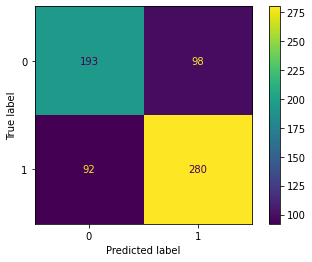

In [211]:
plot_confusion_matrix(final_model, scaled_X_test, y_test)

In [214]:
# Scaling and fitting to the whole data now that we have found the best model:

X_final = scaler.fit_transform(X)

In [218]:
final_fitting = final_model.fit(X, y)

In [219]:
y_pred_final = final_model.predict(X_final)

c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [220]:
print(classification_report(y, y_pred_final))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1525
           1       0.67      0.62      0.64      1787

    accuracy                           0.63      3312
   macro avg       0.63      0.63      0.63      3312
weighted avg       0.63      0.63      0.63      3312



c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Development\Machine Learning\bitcoin-price-prediction\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


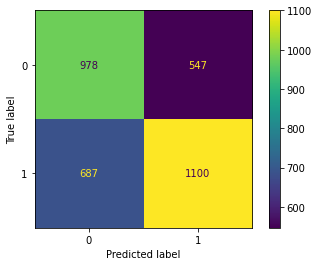

In [228]:
plot_confusion_matrix(final_model, X_final, y)

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date', ylabel='Positive'>

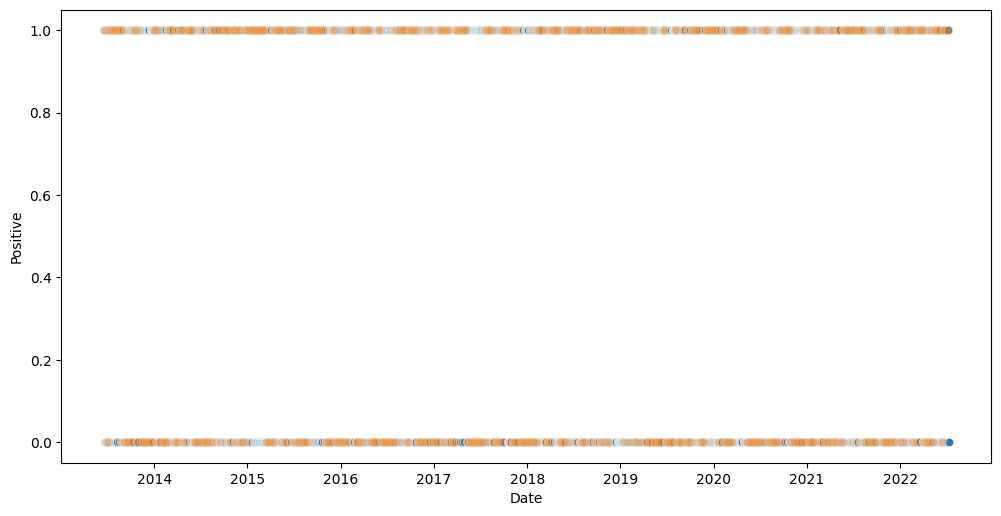

In [229]:
plt.figure(figsize=(12,6), dpi=100)
sns.scatterplot(data=df, x='Date', y='Positive')
sns.scatterplot(x=df['Date'], y=y_pred_final, lw=0.2, alpha=0.05)